In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


import mglearn
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()    
# 한글폰트가 기본적으로 없다.  그래서 따로 등록해서 사용하면 됨
font_name
#(c\windows\fonts  가 기본폰트)

plt.rc('font', family=font_name)

# - 마이너스 표시도 깨진다.
mpl.rcParams["axes.unicode_minus"]=False    #마이너스를 문자로 쓰지 않고 숫자로 쓰겠다. 라는 뜻


import mglearn


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# SVM(Support Vector Machine)

    머신러닝에서 가장 좋 성능을 자랑하는
    
    + 머신러닝 교제 p.202 4장 svm
    + 추가 자료 svm.pdf    

    svm.pdf
    
    1페이지
        회귀선과의 거리 즉 margin에 영향을 주는 벡터들을 
        support vector라고 한다.

        margin이 최대로 넓게 떨어지게 하는것?

    
    
    
    3페이지
        선으로 분류할 수 있는 경우는 그냥 선분류를 하면 되는데

        선으로 분류가 절대 불가능한 경우가 있다.  직선으론 분류가 안되므로
        차원을 높여서 3차원으로 하면 곡선으로 분류가 가능하다. (굉장히 복잡한 수학적 모델이다)
        
        장점 : 
            - 적은량의 데이터로도 모델을 충분히 만들 수 있다.
            - 선형 뿐만 아니라 비선형도 분류가 가능하다. 
    
    12페이지
        svm은 어떤 하이퍼 파라미터를 이용하는가
        
        1) cost
            cost가 작으면(margin을 넓어지게 됨) 모델이 단순해짐
            cost가 높으면(margin이 작아질수있음) 모델이 복잡해짐
                - 훈련은 아주 잘받을 순 있는데 예측이 떨어질 수 있다.
        
        2) Gamma
            감마는 margin을 넓은 값으로 할 r의 값 (식이 있음)
            
            gamma를 작게하면 데이터 하나하나 신경쓰지 않음.
            gamma를 크게하면 데이터 하나하나 위주로 다 나눠버림
                -훈련에서는 좋은 결과이지만 예측치는 처참할 것이다.
    
        3) Grid Search
            두가지를 조합해서 가장 좋은것을 찾는것이 힘들기 때문에
            자동으로 계산해주는 것
            
            Grid Search값이 높을 수록 좋음
            그래서 0.9가 되는 Gamma와 Cost를 쓰면 됨
            

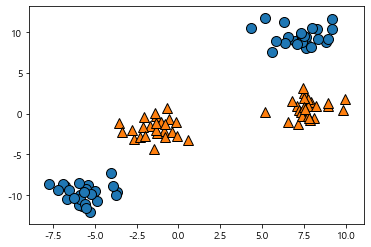

In [7]:
import sklearn

#원하는 데이터 생성
X, y = sklearn.datasets.make_blobs(centers = 4, random_state=8)
# center

# 같은 값으로 바꿔주기 위함.
y = y % 2
mglearn.discrete_scatter(X[:,0], X[:,1], y)

    선형으로 절때 분류가 될수가 없다.
    
    그래서 강제로 해보기
    

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


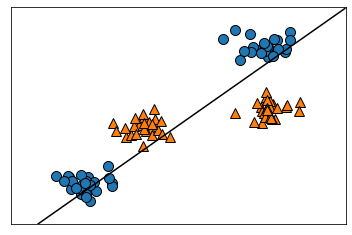

In [10]:
from sklearn.svm import LinearSVC # SV Classifier   #SVR Regression

linear_svm = LinearSVC().fit(X, y)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(linear_svm, X)

    선형모델로는 절때 나눌 수 없다.
    
    그럼 차원을 높여서 3차원으로 해보자

Text(0.5, 0, '특성1 ** 2')

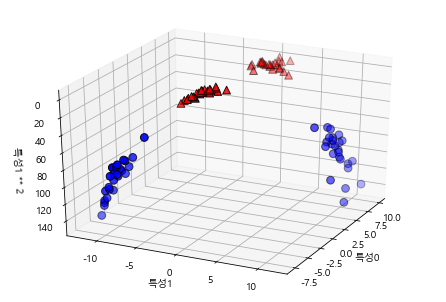

In [11]:
# 3차원으로 표현하기 
X_new = np.hstack([X, X[:, 1:] ** 2])  
#X의 차원을 높였다. 

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1 ** 2')

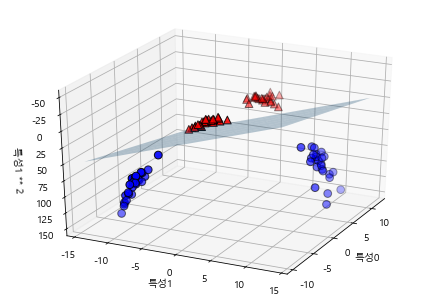

In [12]:
#초평면 긋기

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

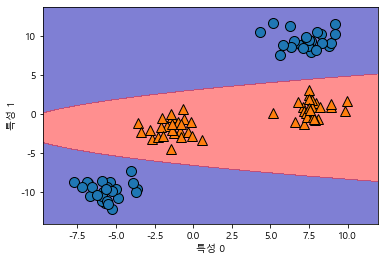

In [13]:
# 다시 2차원으로 변경 
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

    3차원에서의 평면이 2차원에선 이렇게 곡선으로 보인다.
    
    이처럼 선형으로 안되는 비선형 모델들은 SVM에선 '커널'이라는 기법으로 해결한다.
    
    
    커널모델의 대표적 기법 (알아두기만 해라)
        - 가우시안 커널(rbf / Radius Bias f?) : 계산식도 복잡하고 계산량도 엄청 많음. 좋은 성능임
        - 다항식 커널 
        
    
    핵심은 경계선과 가까이 있는 데이터들과의 margin을 계산하는 것이니까
    그걸 하는방식에 여러가지가 있을 뿐

### 파라미터 : cost, gamma

    그럼 SVM에서 성능 조절하는 Hyper parameter는  Gamma, Cost로 한다.

In [15]:
from sklearn.svm import SVC

In [16]:
# 데이터 준비
X, y = mglearn.tools.make_handcrafted_dataset()

In [17]:
# SCM Classifier훈련
svm = SVC(kernel = "rbf")  # kernel의 기본값이 rbf이다.


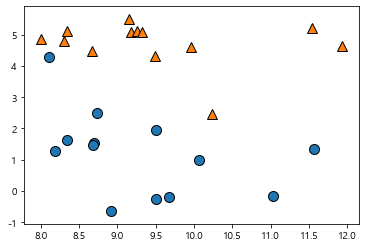

In [18]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [19]:
# hyper param 변경
# 훈련
svm = SVC(kernel = "rbf", C=10, gamma=0.1).fit(X, y)

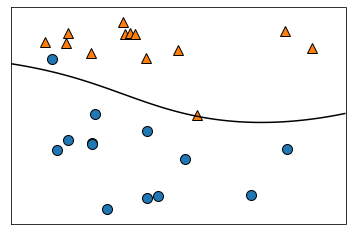

In [21]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(svm, X, eps = 0.5)

    분류 정확도가 어찌되었든 곡선으로 나타남에 주목

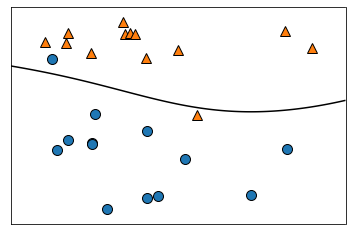

In [22]:
# 파라미터를 조절해서 좀 더 곡선의 형태를 바꿔보자
svm = SVC(kernel = "rbf", C=5, gamma=0.1).fit(X, y)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(svm, X, eps = 0.5)



In [23]:
# 서포트 벡터가 누군가
svm.support_vectors_

array([[ 8.1062269 ,  4.28695977],
       [ 8.7337095 ,  2.49162431],
       [ 9.50169345,  1.93824624],
       [11.563957  ,  1.3389402 ],
       [11.93027136,  4.64866327],
       [ 8.67494727,  4.47573059],
       [10.24028948,  2.45544401],
       [ 7.99815287,  4.8525051 ]])

    5개의 데이터가  경계선 기준 가장 가까운 애들이다. 
    margin을 계산하게 하는 

Text(0, 0.5, '특성 1')

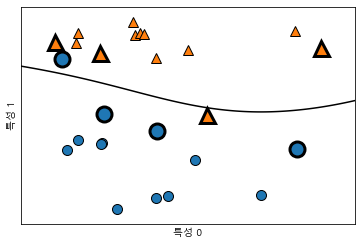

In [26]:
# 요인을 주는 데이터들을 알아보자
svm = SVC(kernel = "rbf", C=5, gamma=0.1).fit(X, y)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(svm, X, eps = 0.5)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

    두껍게 표시된 애들이 support_vector의 역할을 하고 있는 애들이다.
    
    cost와 gamma 차이에 따라 어떻게 바뀌는지 확인해보자

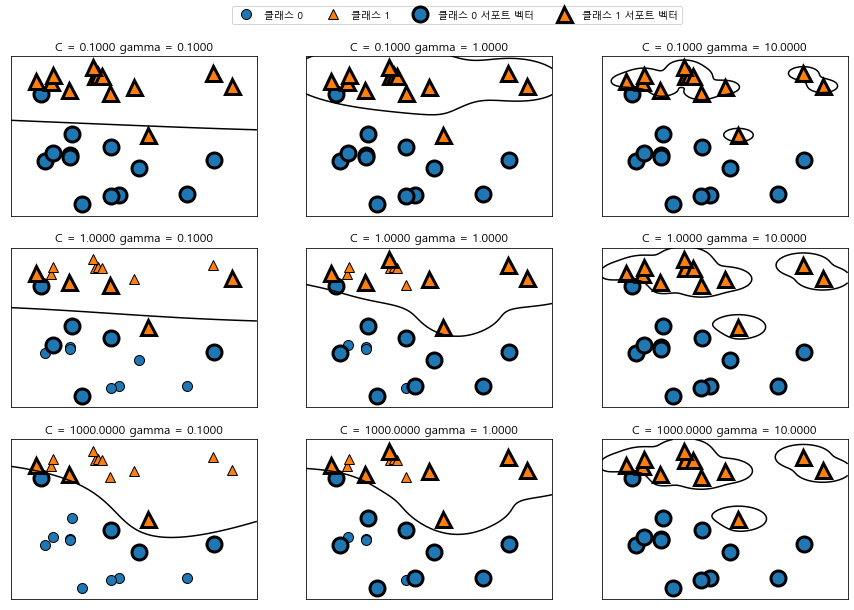

In [29]:
# cost와 gamma 에 따른 그래프 차이
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                 ncol=4, loc=(.9, 1.2))

    같은 cost에서 
    gamma를 높임에 따라 데이터 위주로 되는 것을 확인할 수 있다. 
    
    
    같은 gamma에서
    cost를 높임에 따라 거의 데이터에 맞춰 선이 맞춰지기 시작함. 
    그래서 엄청 높이면 훈련데이터에 맞게 딱 맞춰진다. 
    
    두개가 같이 높아지면
    '훈련'시에는 최상의 조건이 된다.
    다만 과적합이라서 예측에는 별로이다.
    
    

In [34]:
# 유방암 데이터셋
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


# 훈련용 테스트용 구분
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [36]:
svm = SVC() # C=1, gamma = 1/특성의 갯수(X_train.shape[1])
svm.fit(X_train, y_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
print("훈련결과 : ",svm.score(X_train, y_train))
print("테스트결과 : ",svm.score(X_test, y_test))

훈련결과 :  1.0
테스트결과 :  0.6293706293706294


    너무 실망스러운 결과이다.
    아까 svm은 성능이 아주 좋다고 했는데  결과가 이러는것이 말이 되지 않는다.
    
    svm은 스케일에 아주 민감하기 때문에
    스케일 조정을 해줬어야 했다. 
    
    
    스케일 조정 방법
        standard scaler를 사용하는 방법이 있고
    
        min max scaler도 있는거 같다.
    

In [38]:
# 우선 데이터의 모양을 살펴보자
df = pd.DataFrame(cancer.data)
df.columns = cancer.feature_names
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


    반드시 전처리를 해야한다...
    Decision Tree는 안했어도 됐다.
    
    그렇지만 어차피 나머지 알고리즘도 전처리는 필수로 해야했기 때문에
    전처리는 꼭 하자.

## scale 조절 수작업

In [40]:
# 특성별 최소값

min_on_training = X_train.min(axis=0) #열기준 최소값들 추출
min_on_training

array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
       0.000e+00, 0.000e+00, 1.060e-01, 4.996e-02, 1.115e-01, 3.628e-01,
       7.570e-01, 7.228e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
       7.882e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
       7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.565e-01, 5.504e-02])

In [43]:
# 특성별 범위 (최대값 ~ 최소값)
range_on_training = (X_train - min_on_training).max(axis=0)
range_on_training


#현재값에 최소값을 뺀 결과중 가장 큰 결과들을 뽑는다

array([2.11290e+01, 2.41000e+01, 1.44710e+02, 2.35750e+03, 9.20700e-02,
       2.92020e-01, 4.26800e-01, 2.01200e-01, 1.98000e-01, 4.74800e-02,
       2.76150e+00, 4.52220e+00, 2.12230e+01, 5.34972e+02, 2.16170e-02,
       1.04148e-01, 3.96000e-01, 5.27900e-02, 5.35780e-02, 2.89452e-02,
       2.81100e+01, 3.75200e+01, 2.00790e+02, 4.06880e+03, 1.51430e-01,
       1.03071e+00, 1.25200e+00, 2.90300e-01, 5.07300e-01, 1.52460e-01])

In [44]:
# 이것 가지고 scale 조정을 한다.
#
X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test-min_on_training) / range_on_training

In [45]:
# 스케일 된 값으로 훈련
svm2 = SVC().fit(X_train_scaled, y_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
print("훈련결과 : ",svm2.score(X_train_scaled, y_train))
print("테스트결과 : ",svm2.score(X_test_scaled, y_test))

훈련결과 :  0.9483568075117371
테스트결과 :  0.951048951048951


    훈련 결과는 조금 떨어지긴 했지만
    테스트 결과가 아주 좋게 상승했다.
    
    전처리가 이래서 중요하다.

In [47]:
# Cost로 성능 튜닝해보기

svmc1000 = SVC(C=1000).fit(X_train_scaled, y_train)
print("훈련결과 : ",svmc1000.score(X_train_scaled, y_train))
print("테스트결과 : ",svmc1000.score(X_test_scaled, y_test))

훈련결과 :  0.9882629107981221
테스트결과 :  0.972027972027972


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


    와 엄청나게 테스트 결과가 좋아졌다. 
    

### 실습 2 : 붓꽃 데이터

In [49]:
# 붓꽃 데이터

iris = sklearn.datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)

In [51]:
# svm 기본 훈련

svm = SVC().fit(X_train, y_train) 
print("훈련결과 : ",svm.score(X_train, y_train))
print("테스트결과 : ",svm.score(X_test, y_test))

훈련결과 :  0.9714285714285714
테스트결과 :  0.9777777777777777


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


    다행히 Cost, Gamma를 조절하진 않았지만.
    훈련과 테스트 결과가 과대적합같이 크게 차이나지도 않는다.
    
    또한 스케일 조정도 할 필요가 없어 보인다. 

### 실습 3 : 농구 
    data/basketball_stat.csv
    농구선수의 포지션을 예측하기 위한 데이터
    
    그래서 새로운 사람의 스탯을 집어넣으면 이 사람은 어떤 포지션일것이다. 예측을 하는 것

In [54]:
df = pd.read_csv("data/basketball_stat.csv")
df.head()

df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

    C = 
    SG = shouting Guard

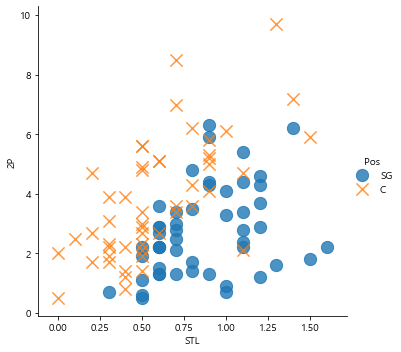

In [56]:
# 컬럼이 너무 많기 때문에 필요한 것, 필요없는 것으로 나눈다.
# 필요, 불필요 컬럼 걸러내기 
    

# 두개씩 나눠본다.


# 스틸, 2점슛
sns.lmplot("STL", "2P", data=df, fit_reg = False, hue = "Pos", markers = ["o", "x"],
          scatter_kws={"s": 150})
#hue : 특성별로 분류



    2점 슛만 쏘는 사람은 스틸을 안하나?
    그게 아니다. 2점슛도 쏘고 스틸도 하기 때문에 불필요한 값이다.
    

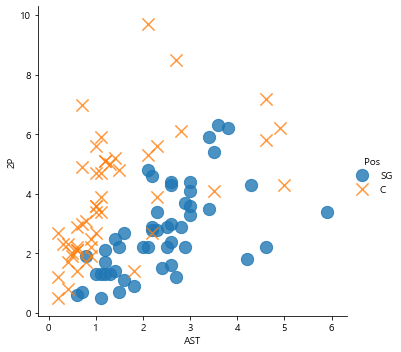

In [57]:
# 어시스트와 2점 슛
sns.lmplot("AST", "2P", data=df, fit_reg = False, hue = "Pos", markers = ["o", "x"],
          scatter_kws={"s": 150})

    어시스트와 2점슛이 확실히 구분이 되는지 확인해봤지만
    어시스트하는 사람은 거의 어시스트만 하고
    2점슛을 쏘는사람은 주로 2점슛을 하진 않는다.. 
    
    이 경우도 불필요한 값.

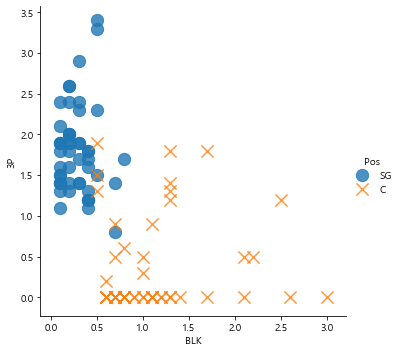

In [58]:
# 불락킹과 3점슛은?
sns.lmplot("BLK", "3P", data=df, fit_reg = False, hue = "Pos", markers = ["o", "x"],
          scatter_kws={"s": 150})


    이 정도가 되어야 뚜렷한 특징이 된다고 할 수 있다.
    괜히 특징이 없는 것을 넣어서 정확도를 떨어뜨리지 말자
    
    이 경우는 필요한 특성이다.
    

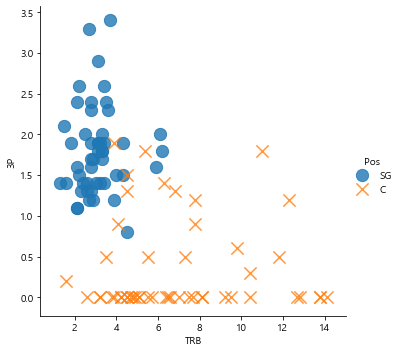

In [59]:
# 리바운드, 3점슛
sns.lmplot("TRB", "3P", data=df, fit_reg = False, hue = "Pos", markers = ["o", "x"],
          scatter_kws={"s": 150})

    이 경우도 뚜렷하기 때문에
    필요한 특성이다.

In [60]:
# 위에서 찾은 불필요한 특성 제거

df.drop(["2P", "AST", "STL"], axis=1, inplace= True)

In [61]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


    필요한 특징만 남겨두었다. 

In [65]:
# 훈련, 테스트 분리

train, test = train_test_split(df, test_size = 0.2)  # 총 100개, 훈련용 80개, 테스트 20개


In [66]:
# 훈련용과 테스트를 나눠서 저장해놓기
import pickle

# 아주 복잡한 구조도 단순하게 하는 저장하는 방법
# 파일로 저장(직렬화)
with open("data/basketball_train.pkl","wb") as train_data :# wb byte로 저장
    pickle.dump(train, train_data)
    
with open("data/basketball_test.pkl","wb") as test_data :# wb byte로 저장
    pickle.dump(test, test_data)
    

In [68]:
# 직렬화 불러오기 
# 컴퓨터 껐다가 켰을 때 여기서부터 작업하면 되게 한다. 


with open("data/basketball_train.pkl","rb") as train_data :# wb byte로 저장
    train = pickle.load(train_data)
    
with open("data/basketball_test.pkl","rb") as test_data :# wb byte로 저장
    test =  pickle.load(test_data)

In [70]:
# SVM의 최적의 파라미터 찾기

from sklearn.model_selection import GridSearchCV

# 적합도를 봐야할 경우도 있음
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [73]:
X_train = train[["3P", "BLK"]]
y_train = train["Pos"]

# 파라미터로 쓸 값을 미리 담아둔다.
svm_parameters = [{"kernel":["rbf"],"gamma":[0.00001,0.0001, 0.001, 0.01, 1],
                  "C":[0.01, 0.1, 1, 10, 100, 1000]}]


svm = GridSearchCV(SVC(), svm_parameters, cv=10).fit(X_train, y_train)  
# GridSearch인자
# 어떤 알고리즘을 쓸것인가, 파라미터 값
# cv : Cross Validalid     (교차 검정)
# 10 이라고 하면 100개의 데이터중 
# 최초 10개를 먼저 훈련용, 나머지 90개 테스트
# 두번째 10개를 훈련용, 나머지를 테스트용... 이렇게 진행
# 어 테스트 데이터가 없네?

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [74]:
#     어떤 값을 최적으로 찾았을까    
print(svm.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


    Cost : 0.1
    Gamma : 1일때가 최적의 값으로 찾았다. 
    
    그런데 훈련, 테스트 나눌때마다 결과가 바뀌긴 한다. 실행해보면 나랑 다를 수 있다.
    
    

In [75]:
# 테스트
    
X_test = test[["3P", "BLK"]]
y_test = test["Pos"]

pred  = svm.predict(X_test)

print("정확도 : ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정확도 :  0.9
              precision    recall  f1-score   support

           C       0.89      0.89      0.89         9
          SG       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



    정확도는 95%로 나온다.  이것도 위 결과에 따라 다를 수 있음

In [76]:
# 예측값, 실제값 비교해보기 
df_compare = pd.DataFrame({"prdiction":pred, "truth":y_test})
df_compare

,prdiction,truth
96,C,SG
97,SG,SG
89,SG,SG
94,SG,SG
40,C,C
62,C,C
14,SG,SG
58,SG,SG
20,SG,SG
86,SG,SG


    맞은 결과 틀린결과가 1개만 있는 것을 보면 
    많이 정확한 결과를 맞췄다는 것을 알 수 있다.
    
    이것도 매번 결과가 달라질 것이다.

## 손글씨 훈련
    MNIST 데이터를 이용한 SVM
    
    p.181 쪽?
    
    실제 사이트에서 이미지를 받아서 훈련시키는 것

In [79]:
# 6만장의 이미지데이터 샘플 다운받기
import urllib.request as req
import gzip, os, os.path

savepath = "./data/mnist" # 저장위치
baseurl = "http://yann.lecun.com/exdb/mnist"
files = ["train-images-idx3-ubyte.gz","train-labels-idx1-ubyte.gz","t10k-images-idx3-ubyte.gz","t10k-labels-idx1-ubyte.gz"]

# 다운로드
if not os.path.exists(savepath): os.mkdir(savepath)
for f in files:
    url = baseurl + "/" + f
    loc = savepath + "/" + f
    print("download:", url)
    if not os.path.exists(loc):
        req.urlretrieve(url, loc)
        
# GZip 압축 해제
for f in files:
    gz_file = savepath + "/" + f
    raw_file = savepath + "/" + f.replace(".gz", "")
    print("gzip:", f)
    with gzip.open(gz_file, "rb") as fp:
        body = fp.read()
        with open(raw_file, "wb") as w:
            w.write(body)
print("ok")

download: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
gzip: train-images-idx3-ubyte.gz
gzip: train-labels-idx1-ubyte.gz
gzip: t10k-images-idx3-ubyte.gz
gzip: t10k-labels-idx1-ubyte.gz
ok


    파일을 보면
    
        t10k images-idx3 10000장 샘플

        train_images-idx3는 훈련용 6만장

In [81]:
## 이미지를 읽어서 숫자로 변경하여 CSV로 저장

import struct
def to_csv(name, maxdata):
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open("./data/mnist/"+name+"-labels-idx1-ubyte", "rb")
    img_f = open("./data/mnist/"+name+"-images-idx3-ubyte", "rb")
    
    csv_f = open("./data/mnist/"+name+".csv", "w", encoding="utf-8")
    # 헤더 정보 읽기 --- (※1)
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols
    # 이미지 데이터를 읽고 CSV로 저장하기 --- (※2)
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        # 잘 저장됐는지 이미지 파일로 저장해서 테스트하기 -- (※3)
        if idx < 10:
            s = "P2 28 28 255\n"
            s += " ".join(sdata)
            iname = "./data/mnist/{0}-{1}-{2}.pgm".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()
# 결과를 파일로 출력하기 --- (※4)
to_csv("train", 10000)   # 10,000개만 가지고 진행
to_csv("t10k", 500)
        

        
# pgm으로 저장한건 잘 뽑아졌는지 확인하려고 뽑은거라 지워도 상관없다.

    csv_f = open("./data/mnist/"+name+".csv", "w", encoding="utf-8")
    
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8)) 

        파일 안에 보면 다 숫자인데, 헤더부분도 있고 실제 데이터도 있을것임.
        이 파일의 2진수 값을 보면 첫번째 바이트가 이게 어떤형식인지를 나타냄(울트라에디터)
        만약 B로 시작한다면 label로 읽어들인다.

        이미지는 크게 bit map형식 // 작게는 pbm, pgn, ppm 으로 주로 나뉜다.

        PBM : 한 픽셀 1비트  (그래서 흑백) 완벽한 흑백임
        PGM : 한 픽셀 1바이트 (1바이트라서 색이 좀 여러개 표현이 가능 근데 흑백임) pgm의 g는 Gray
        PPM : 한 픽셀 3바이트 RGB여서 3바이트 
    
    unpack "  >|| " cpu에따라 앞에서부터 처리하냐 뒤에서부터 처리하냐 의미인데 중요하지않음
    
    
    header의 
    첫번째 보면 매직넘버(MN)라고 해서 이미지의 종류를 구분하는 숫자가 쓰여있음.
    그 다음은 파일의 크기
    그 다음은 영상의 최대값 (최대로 표현할 수 있는값)
    
    
    s = "P2 28 28 255\n"
    
        맨 앞
            P1, P4 : PBM
            P2, P5 : PGM
            P3, P6 : PPM
            
        두번째
            28*28 ZMRL
            
        네번째 
            255  8비트니까  표현 최댓값 255
            
-------------------------------------------------------------  
 
    받은 파일을 보면 이게 기본프로그램은 안보이기때문에 꿀뷰(반디집 회사) 봐야한다.
    
    우선 6만장 테스트를 할 수가 없으므로 500장 가지고 테스트 해본다.

In [82]:
from sklearn import model_selection, svm, metrics

def load_csv(fname):
    labels = []
    images = []
    
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2:
                continue
            
            labels.append(int(cols.pop(0)))
            
            vals = list(map(lambda n:int(n)/256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}

data = load_csv("./data/mnist/train.csv")
test = load_csv("./data/mnist/t10k.csv")

    훈련용, 테스트용으로 불러 읽는 것

In [88]:
# 첫번째 이미지 파일 불러읽어와보기
print(data["images"][2])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26171875, 0.90625, 0.15234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2421875, 0.31640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.46875, 0.703125, 0.1523437

In [89]:
print(data["labels"][2])  #정답

4


In [90]:
# 학습시키기

model = SVC().fit(data["images"], data["labels"])

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [91]:
# 500개 테스트 데이터로 결과 예측해보기
pred = model.predict(test["images"])

#결과 확인
ac_score = accuracy_score(test["labels"], pred)
print("정확도 : ", ac_score)

정확도 :  0.9161676646706587


    10000게를 가지고 훈련했을 때 
    결과 예측도는 91%이다.
    
    만약 6만개로 했었으면 좀 더 정확도가 증가했을 것이다.

In [92]:
print(classification_report(test["labels"], pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.97      1.00      0.99        67
           2       0.96      0.89      0.92        55
           3       0.93      0.85      0.89        46
           4       0.90      0.96      0.93        55
           5       0.84      0.92      0.88        50
           6       0.97      0.86      0.91        43
           7       0.87      0.92      0.89        49
           8       0.90      0.88      0.89        40
           9       0.94      0.89      0.91        54

    accuracy                           0.92       501
   macro avg       0.92      0.91      0.91       501
weighted avg       0.92      0.92      0.92       501



In [96]:
# 맨 마지막 데이터로 예측해보라고 던져봤을때
pred1 = model.predict([test["images"][500]])
print("입력이미지 : ",pred1)

print("결과 값 : ",test["labels"][500])

입력이미지 :  [3]
결과 값 :  3


    3이라고 맞추었다.
    
    실제 이미지랑 확인해보면 3이 맞다.

In [97]:
# 내가 직접 손글씨를 입력해서 테스트 해보기 (html)
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas> 
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""
#canvas는 그리는 태그


javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

#function set_value
# python과 연결 시켜서 이미지로 만드는 함수

In [110]:
# HTML로 열수 있는 패키지
from IPython.display import HTML

HTML(input_form + javascript)


In [111]:
# 입력값을 변환

print(image)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 

In [112]:
# 이걸 가지고 예측

pred2 = model.predict([image])
pred2

array([7])